# SVM Classifier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading data
df=pd.read_csv('UniversalBank.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
#info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


# Data Preparation

In [4]:
#droping ID
df.drop("ID",axis=1,inplace = True)

In [5]:
#droping ZIP
df.drop("ZIP Code",axis=1,inplace = True)

In [6]:
df.drop("Experience",axis=1,inplace = True)

In [7]:
df.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [8]:
df.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [9]:
df.Mortgage.value_counts()

0      3462
98       17
103      16
119      16
83       16
       ... 
541       1
509       1
505       1
485       1
577       1
Name: Mortgage, Length: 347, dtype: int64

In [10]:
df["Personal Loan"].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [11]:
df["Securities Account"].value_counts()  

0    4478
1     522
Name: Securities Account, dtype: int64

In [12]:
df["CD Account"].value_counts()  

0    4698
1     302
Name: CD Account, dtype: int64

In [13]:
df["Online"].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [14]:
df["CreditCard"].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [15]:
#describe data
df.describe()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


# OUTLIERS BOXPLOT

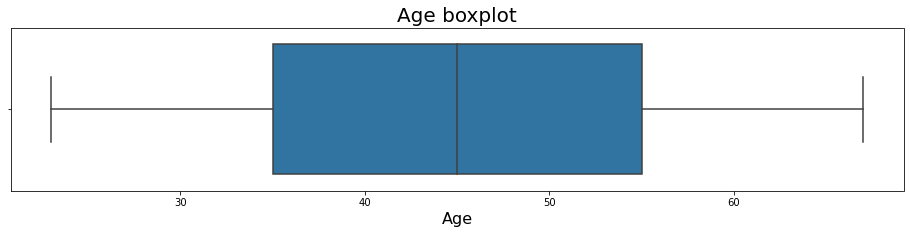

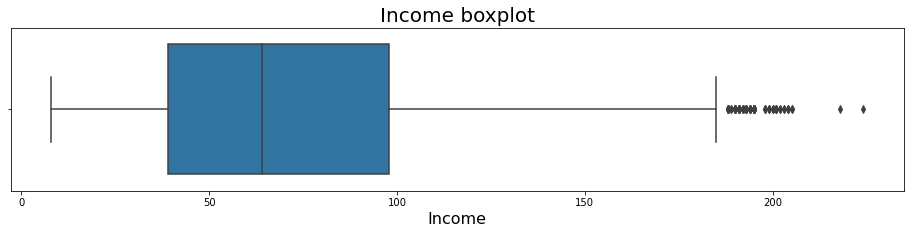

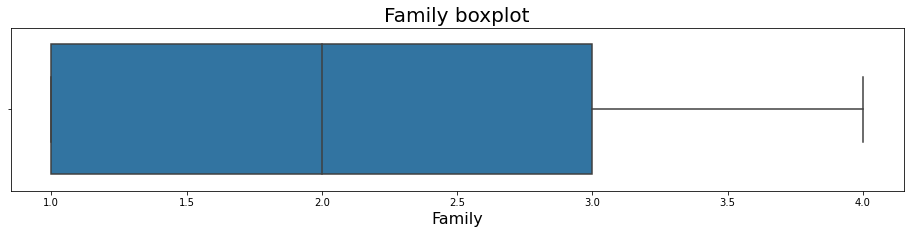

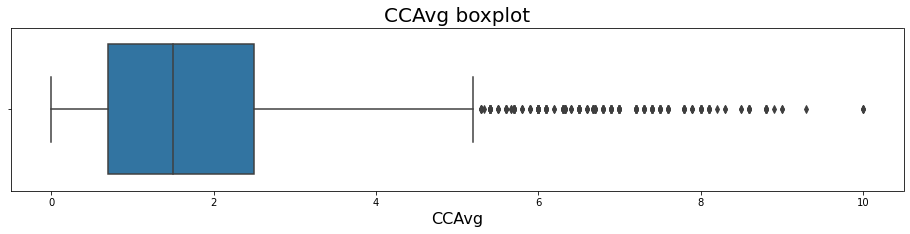

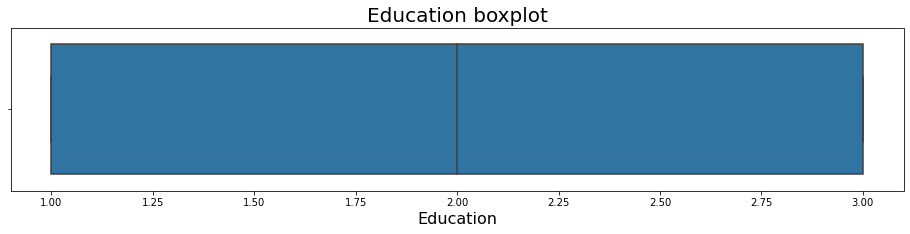

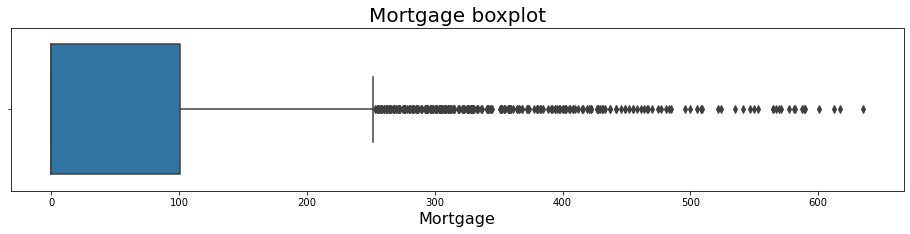

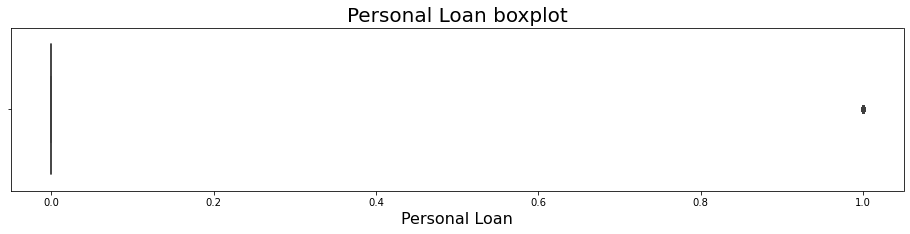

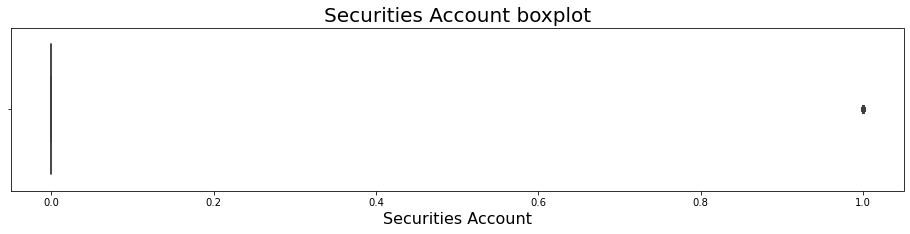

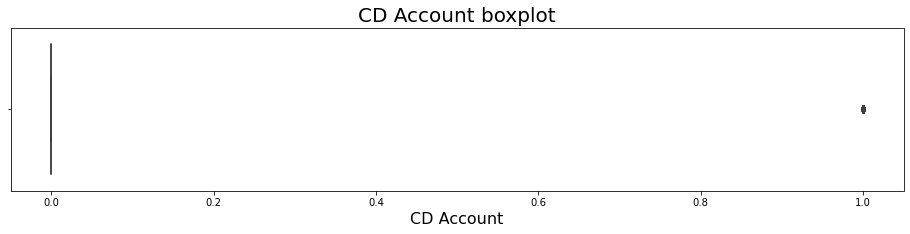

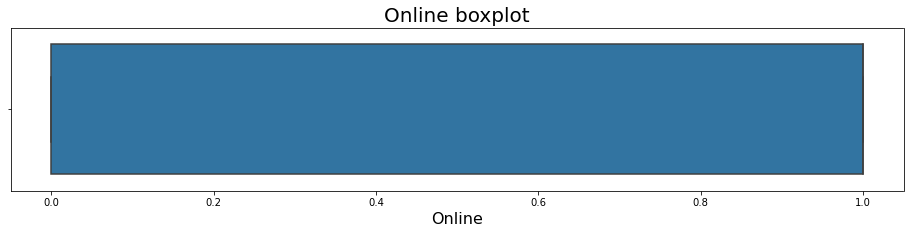

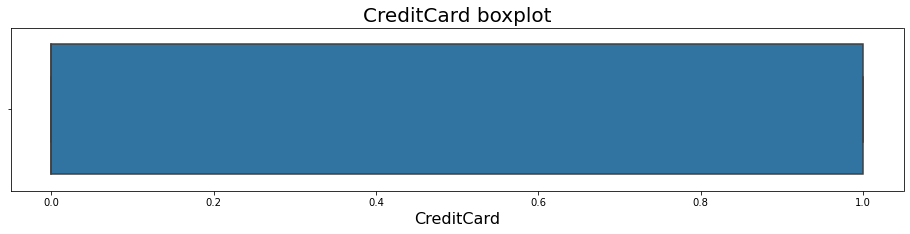

In [16]:
#box plots
for col_name in df:
    plt.figure(figsize=(16, 3))
    sns.boxplot(x=df[col_name])
    plt.title(col_name + " boxplot", fontsize=20)
    plt.xlabel(col_name, fontsize=16)
    plt.show()

In [17]:
#removing outliers in these columns
#col = ["Mortgage","CCAvg","Income"]
#for col_name in col:
    # removing (statistical) outliers
    #Q1 = df[col_name].quantile(0.25)
    #Q3 = df[col_name].quantile(0.75)
    #IQR = Q3 - Q1
    #df = df[(df[col_name] >= Q1 - 1.5*IQR) & (df[col_name] <= Q3 + 1.5*IQR)]

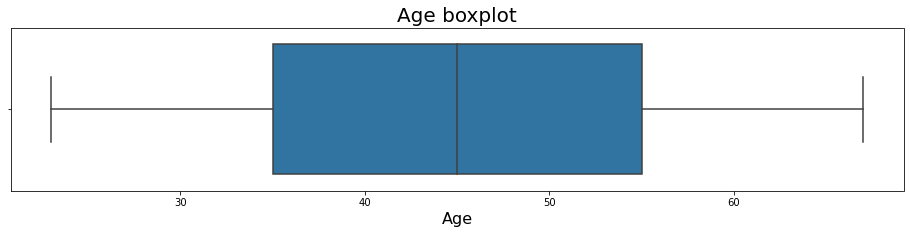

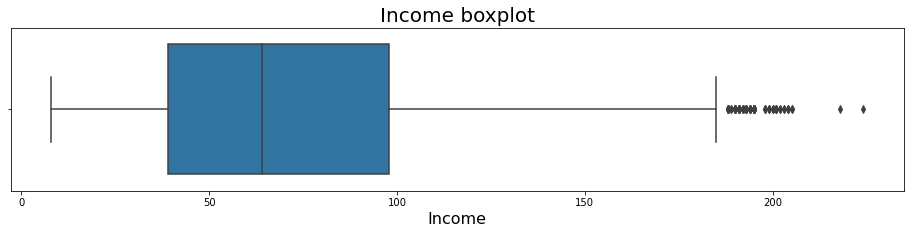

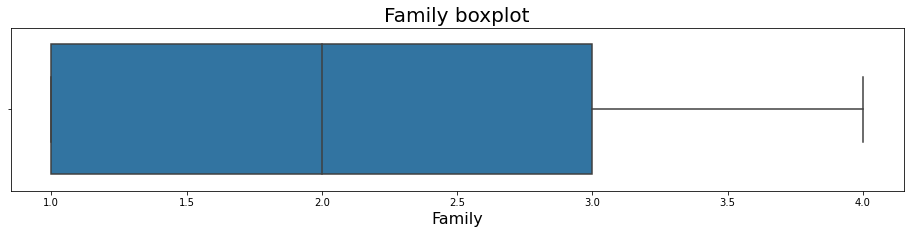

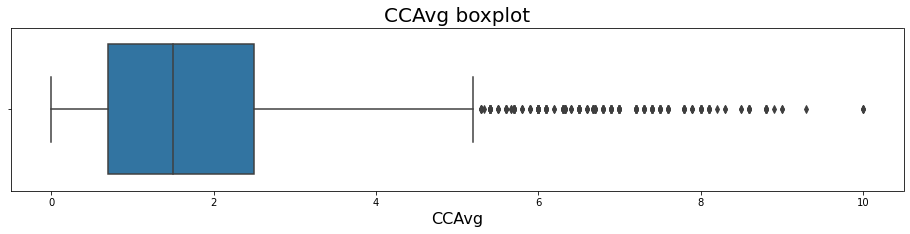

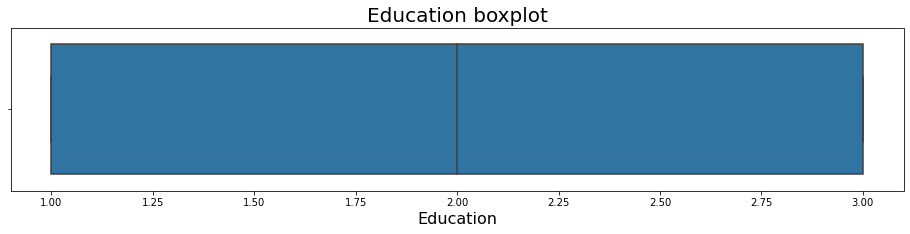

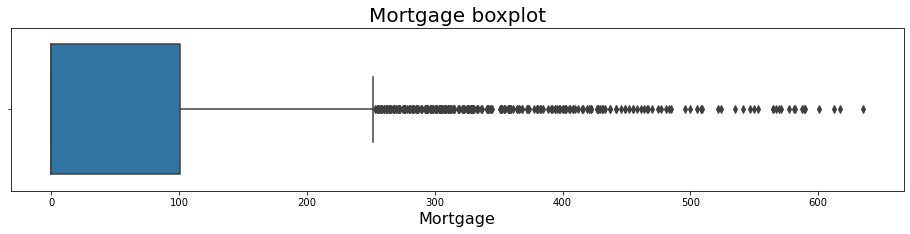

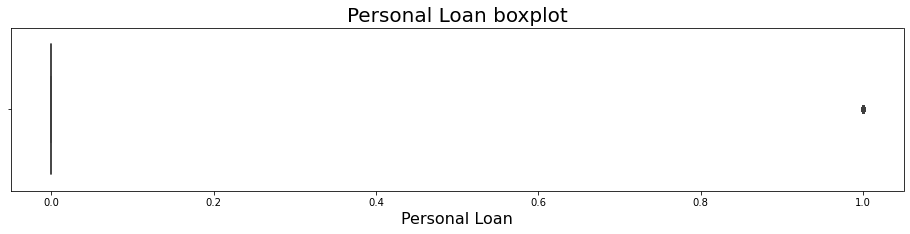

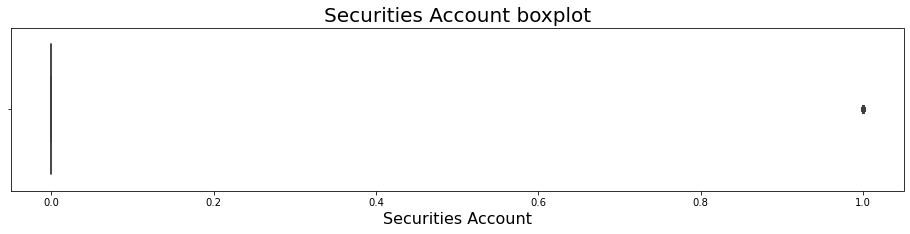

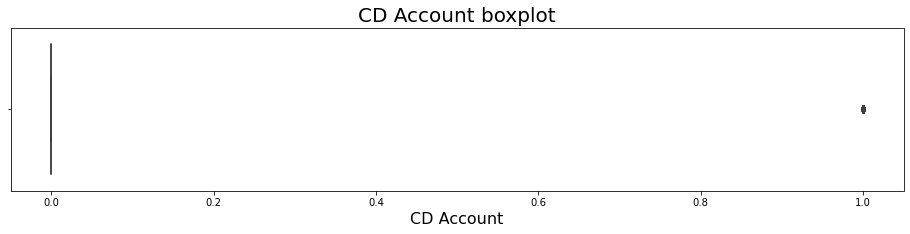

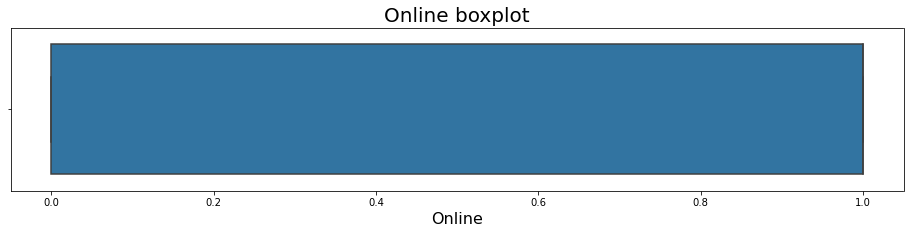

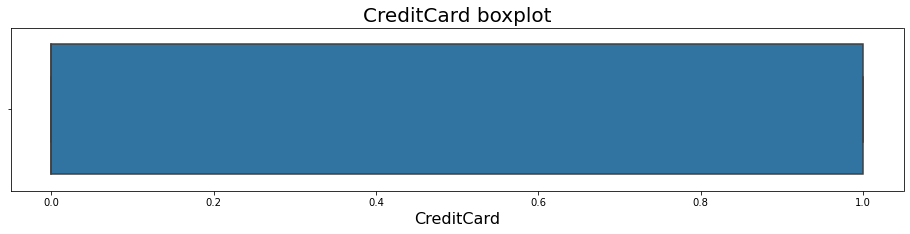

In [18]:
for col_name in df:
    plt.figure(figsize=(16, 3))
    sns.boxplot(x=df[col_name])
    plt.title(col_name + " boxplot", fontsize=20)
    plt.xlabel(col_name, fontsize=16)
    plt.show()

In [19]:
df.shape

(5000, 11)

In [20]:
df.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


# Percentage Of Target Variable

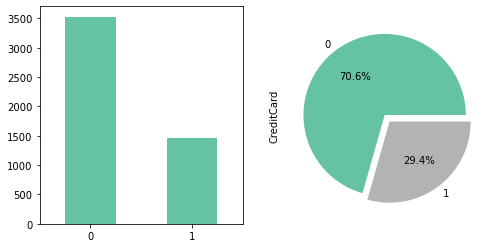

In [21]:
#For Target Variable
plt.rcParams['figure.figsize'] = 8,4
fig,ax = plt.subplots(1,2)
df['CreditCard'].value_counts().plot(kind='bar',rot=0,ax=ax[0],cmap='Set2')
df['CreditCard'].value_counts().plot(kind='pie',autopct='%.1f%%',ax=ax[1],cmap='Set2',explode=[0,0.1])
plt.show()

# Heat Map

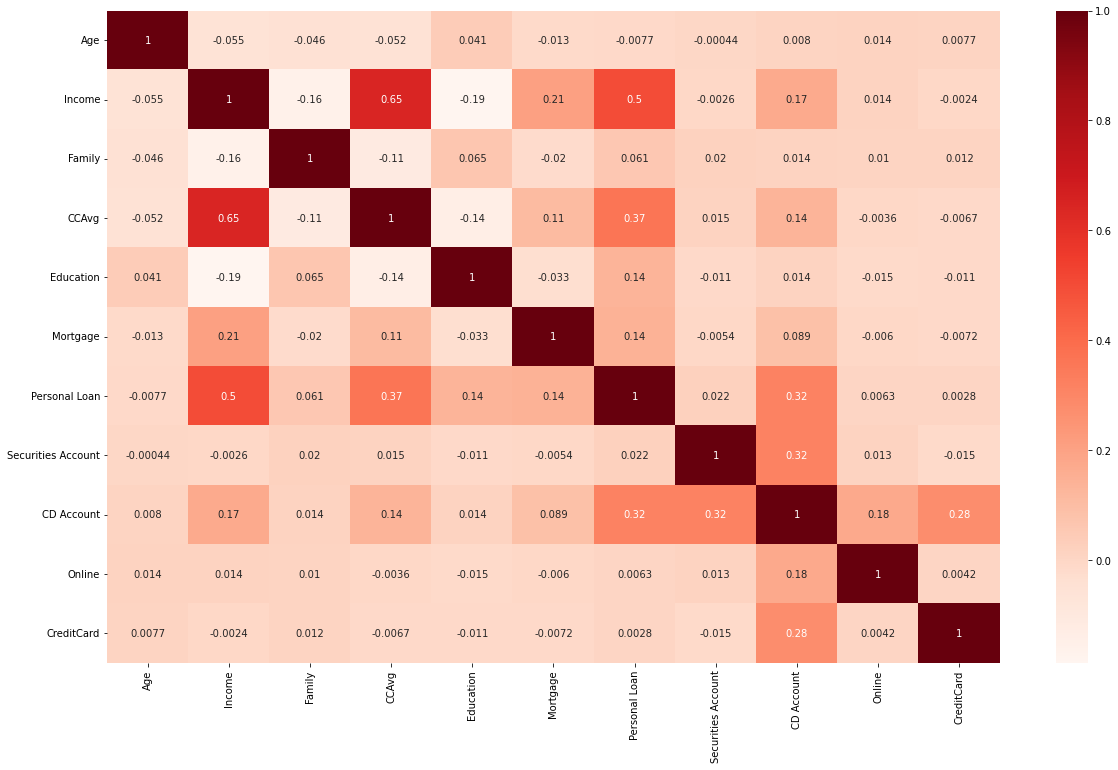

In [22]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),cmap=plt.cm.Reds,annot=True)

# Dummy Variables

In [23]:
df = pd.get_dummies(df, columns=['Family','Education','Personal Loan','Securities Account','CD Account','Online'],drop_first=True)

In [24]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X = df.drop("CreditCard",axis=1)
y = df["CreditCard"]

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=109) # 70% training and 30% test

In [25]:
X_train, X_test

(      Age  Income  CCAvg  Mortgage  Family_2  Family_3  Family_4  Education_2  \
 463    48     149   5.50         0         1         0         0            1   
 624    33      54   1.67       122         1         0         0            1   
 4455   56      28   1.50         0         0         0         0            1   
 3104   56      48   2.10         0         1         0         0            0   
 1954   44      81   2.00       277         0         0         1            0   
 ...   ...     ...    ...       ...       ...       ...       ...          ...   
 2635   40      33   0.80        89         1         0         0            0   
 2447   44     201   8.80         0         1         0         0            0   
 141    35      58   2.00       149         0         1         0            0   
 3317   65      79   2.00         0         0         1         0            0   
 3334   40      30   0.80        86         1         0         0            0   
 
       Educati

In [26]:
y_train, y_test

(463     0
 624     0
 4455    1
 3104    1
 1954    0
        ..
 2635    0
 2447    1
 141     1
 3317    0
 3334    0
 Name: CreditCard, Length: 3500, dtype: int64,
 1741    0
 304     0
 4884    1
 1935    1
 4752    0
        ..
 500     0
 2957    0
 2051    0
 2591    0
 344     1
 Name: CreditCard, Length: 1500, dtype: int64)

## Scalling Data

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [28]:
#num_vars
num_vars = df.select_dtypes(exclude =["object","uint8"]).columns

num_vars = list(num_vars)

num_vars.remove("CreditCard")

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

X_train.head(10)

,Age,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,Personal Loan_1,Securities Account_1,CD Account_1,Online_1
463,0.234913,1.638376,2.021732,-0.546278,1,0,0,1,0,1,1,1,1
624,-1.085387,-0.425359,-0.158908,0.637474,1,0,0,1,0,0,0,0,1
4455,0.939073,-0.990171,-0.255699,-0.546278,0,0,0,1,0,0,1,1,1
3104,0.939073,-0.555700,0.085916,-0.546278,1,0,0,0,1,0,0,0,0
1954,-0.117167,0.161176,0.028980,2.141421,0,0,1,0,1,0,0,0,1
3417,-0.557267,-1.098788,-0.540377,-0.546278,0,1,0,1,0,0,0,0,1
2375,0.851053,-0.099506,-0.369570,-0.546278,0,0,1,0,1,0,1,1,1
3805,-1.437468,0.226347,-0.654249,-0.546278,0,1,0,0,0,0,0,0,0
4294,1.115113,1.660100,3.103511,4.120809,0,0,0,0,0,0,0,0,1
3135,-1.789548,0.378411,-0.084891,2.568348,1,0,0,1,0,0,0,0,0


In [29]:
#num_vars
num_vars = df.select_dtypes(exclude =["object","uint8"]).columns

num_vars = list(num_vars)

num_vars.remove("CreditCard")

X_test[num_vars] = scaler.transform(X_test[num_vars])

X_test.head(10)

,Age,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,Personal Loan_1,Securities Account_1,CD Account_1,Online_1
1741,-0.029147,1.030117,1.566246,-0.546278,0,0,0,0,0,0,0,0,0
304,0.234913,-1.120512,-1.052799,-0.546278,0,0,0,0,0,0,0,0,0
4884,1.291153,-0.512253,0.142852,-0.546278,0,1,0,0,1,0,0,0,1
1935,-0.997367,2.550764,1.623182,-0.546278,0,0,0,0,1,1,0,1,1
4752,-0.557267,2.268358,1.224631,1.462219,0,0,0,0,0,0,0,0,1
4220,0.763033,-0.751212,-1.052799,-0.546278,0,0,1,0,1,0,1,0,1
996,-1.085387,-0.533977,-0.158908,1.530139,1,0,0,1,0,0,0,0,0
4117,-0.557267,-1.207406,-0.995863,-0.546278,0,0,1,0,1,0,1,0,0
2261,-1.349448,1.660100,1.737053,-0.546278,0,0,1,1,0,1,0,0,1
1840,0.851053,-1.098788,-0.881992,0.307576,0,0,1,0,1,0,0,0,0


# SVM Classification Model(Linear)

In [30]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [31]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.738


In [32]:
print ('Train Accuracy :',clf.score(X_train,y_train))
print ('Test Accuracy :',clf.score(X_test,y_test))

Train Accuracy : 0.7431428571428571
Test Accuracy : 0.738


In [33]:
clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

# SVM Classification Model(RBF)

In [34]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='rbf') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [35]:
#accuracy
print ('Train Accuracy :',clf.score(X_train,y_train))
print ('Test Accuracy :',clf.score(X_test,y_test))

Train Accuracy : 0.7491428571428571
Test Accuracy : 0.7373333333333333


## Hyper Parameter Tunning(RBF Kernel)

In [36]:
from sklearn.model_selection import GridSearchCV
  
clf = svm.SVC()
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(clf, param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.710, total=   0.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.710, total=   0.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.710, total=   0.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.710, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.710, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.710, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.710, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.710, total=   0.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.710, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.753, total=   0.7s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.731, total=   0.8s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.750, total=   0.9s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.743, total=   0.9s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.739, total=   0.8s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.753, total=   0.3s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.731, total=   0.3s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.743, total=   6.4s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.739, total=   5.7s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.753, total=   1.3s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.731, total=   1.3s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.750, total=   1.5s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.743, total=   1.7s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.739, total=   1.7s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  3.0min finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [37]:
#best parameters
grid.best_params_

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

In [38]:
#best score
grid.best_score_

0.7477142857142857

## Model After Hyper Parameter Tunning

In [53]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(C= 10, gamma= 0.01, kernel= 'rbf') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

## Evaluation

In [54]:
print ('Train Accuracy :',clf.score(X_train,y_train))
print ('Test Accuracy :',clf.score(X_test,y_test))

Train Accuracy : 0.7431428571428571
Test Accuracy : 0.738


In [55]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, y_pred )
confusion

array([[1030,   15],
       [ 378,   77]], dtype=int64)

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           0       0.73      0.99      0.84      1045
           1       0.84      0.17      0.28       455

    accuracy                           0.74      1500
   macro avg       0.78      0.58      0.56      1500
weighted avg       0.76      0.74      0.67      1500

